In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:

# A fájl elérési útvonalának megadása
file_path = '1709906900_07f6f0cb-56a4-40b1-a14b-a0208d22bbf8_water_1000Primaries_1.hits.npy'

# A fájl beolvasása numpy tömbként
data = np.load(file_path)

# A numpy tömb konvertálása pandas DataFrame-é
df = pd.DataFrame(data)

# Az adatok megjelenítése
print(df.head())


   PDGEncoding  trackID  parentID          time  eventID      posX       posY  \
0         2212        1         0  4.266860e-09        0 -4.290672 -12.014001   
1         2212        1         0  4.651038e-09        0 -4.401403 -13.966887   
2         2212        1         0  4.937034e-09        0 -4.612718 -15.247976   
3         2212        1         0  4.973887e-09        0 -4.656821 -15.420478   
4         2212        1         0  5.011235e-09        0 -4.693545 -15.602463   

         posZ   momDirX   momDirY  ...  volumeID[0]  volumeID[1]  volumeID[2]  \
0  225.354004 -0.000040 -0.032942  ...            0            1            0   
1  283.153992 -0.003881 -0.032686  ...            0            1            0   
2  326.093994 -0.007630 -0.029960  ...            0            1            1   
3  331.593994 -0.004614 -0.032237  ...            0            1            1   
4  337.093994 -0.011429 -0.042155  ...            0            1            1   

   volumeID[3]  volumeID[4

In [6]:
df['Layer'] = 2*df["volumeID[2]"]+df["volumeID[3]"]
column_names = df.columns
print("Oszlopnevek:", column_names)

Oszlopnevek: Index(['PDGEncoding', 'trackID', 'parentID', 'time', 'eventID', 'posX', 'posY',
       'posZ', 'momDirX', 'momDirY', 'momDirZ', 'edep', 'volumeID[0]',
       'volumeID[1]', 'volumeID[2]', 'volumeID[3]', 'volumeID[4]',
       'volumeID[5]', 'volumeID[6]', 'volumeID[7]', 'volumeID[8]',
       'volumeID[9]', 'Layer'],
      dtype='object')


In [7]:
#A psa kapcsolóval előállított szögekkel való összehasonlítás elvégézése

In [8]:
#Az edep felösszegzése csak egy részecskére

In [9]:
#edep deposited energy

In [10]:

print(df.iloc[100])

PDGEncoding    2.212000e+03
trackID        1.000000e+00
parentID       0.000000e+00
time           5.662637e-09
eventID        7.000000e+00
posX           3.737074e+00
posY          -6.099057e+00
posZ           4.140940e+02
momDirX       -1.455852e-02
momDirY        1.295344e-01
momDirZ        9.914681e-01
edep           7.775696e-02
volumeID[0]    0.000000e+00
volumeID[1]    1.000000e+00
volumeID[2]    1.000000e+00
volumeID[3]    1.600000e+01
volumeID[4]    3.000000e+00
volumeID[5]   -1.000000e+00
volumeID[6]   -1.000000e+00
volumeID[7]   -1.000000e+00
volumeID[8]   -1.000000e+00
volumeID[9]   -1.000000e+00
Layer          1.800000e+01
Name: 100, dtype: float64


 2212          16370
 11             2278
-11              298
 22               10
 1000100200        2
 1000140280        2
 1000130270        2
 1000010020        2
 1000020040        1
Name: PDGEncoding, dtype: int64


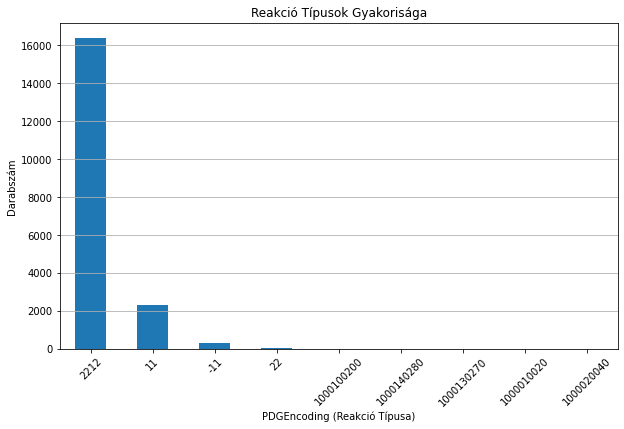

In [11]:
import pandas as pd
import matplotlib.pyplot as plt



# Az egyes PDGEncoding típusok gyakoriságának számítása
reaction_types_counts = df['PDGEncoding'].value_counts()

# A gyakoriságok kiíratása
print(reaction_types_counts)

# A gyakoriságok histogramjának megjelenítése
plt.figure(figsize=(10, 6))
reaction_types_counts.plot(kind='bar')
plt.title('Reakció Típusok Gyakorisága')
plt.xlabel('PDGEncoding (Reakció Típusa)')
plt.ylabel('Darabszám')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


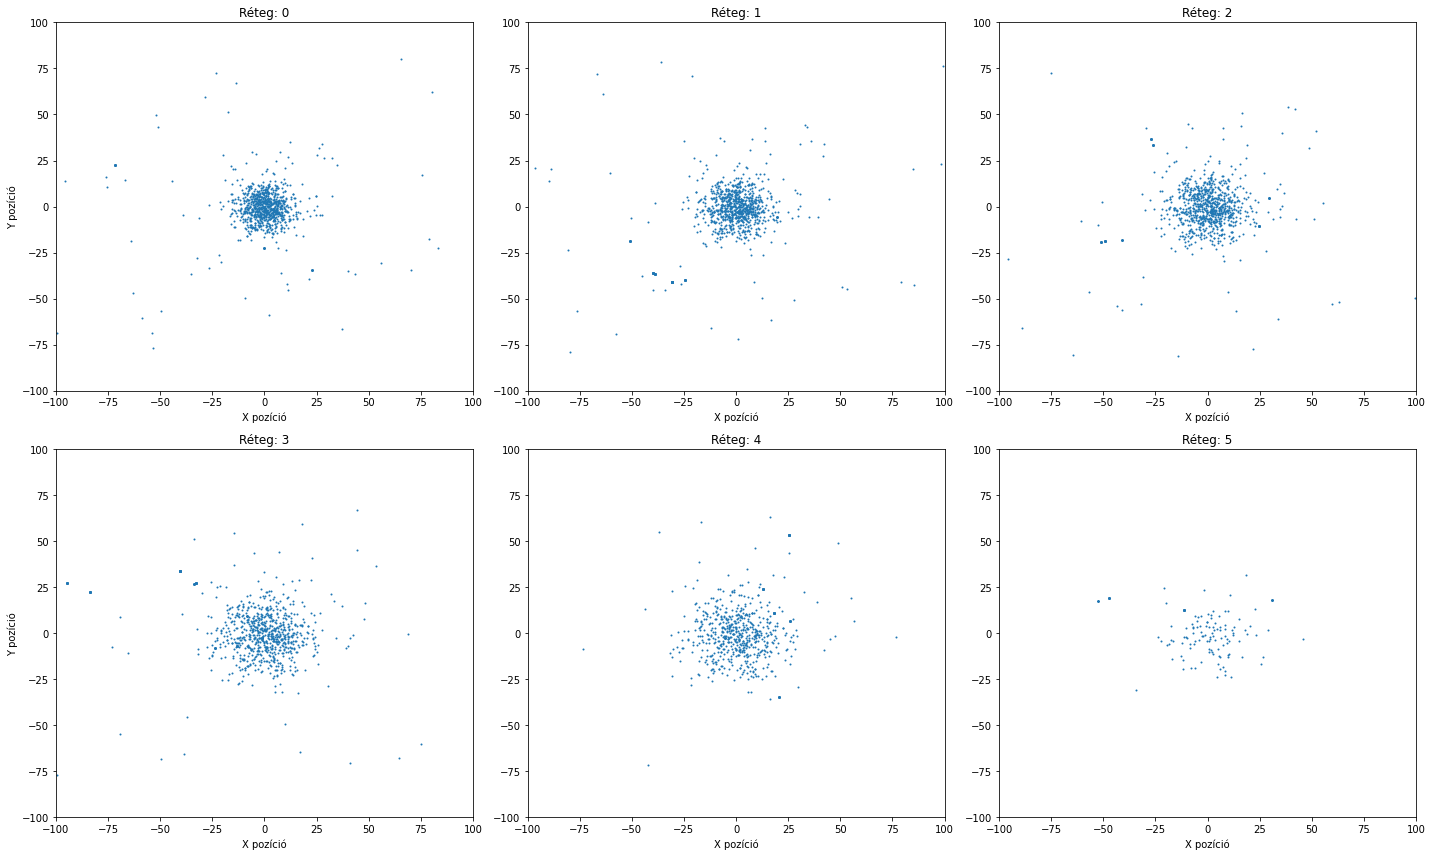

In [12]:
    
fig, axs = plt.subplots(2, 3, figsize=(20, 12))  # Módosítva a subplot sorok/oszlopok számát

axs = axs.flatten()  # A többdimenziós tömböt egydimenzióssá alakítjuk az egyszerű indexelés érdekében

for i,k in enumerate( [0,1, 4, 15, 20, 21]):
    dft = df[df.Layer== k]
    axs[i].scatter(dft.posX, dft.posY, s=1)
    axs[i].set_ylim(-100, 100)
    axs[i].set_xlim(-100, 100)
    
    axs[i].set_title(f'Réteg: {i}')
    axs[i].set_xlabel('X pozíció')
    if i % 3 == 0:  # Minden sor első eleménél adjuk meg az Y címkét
        axs[i].set_ylabel('Y pozíció')

plt.tight_layout()
plt.show()

    

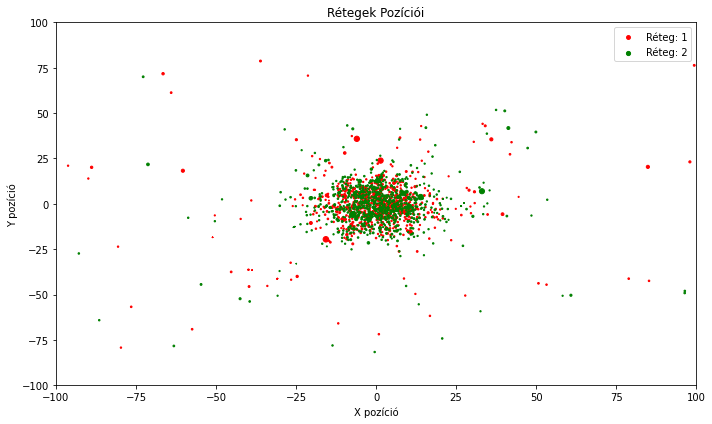

In [25]:



fig, ax = plt.subplots(figsize=(10, 6))


colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']


for i, k in enumerate([1, 2]):
    dft = df[df.Layer == k]
    ax.scatter(dft.posX, dft.posY, s=100*dft.edep, color=colors[i], label=f'Réteg: {k}')

ax.set_ylim(-100, 100)
ax.set_xlim(-100, 100)
ax.set_title('Rétegek Pozíciói')
ax.set_xlabel('X pozíció')
ax.set_ylabel('Y pozíció')


ax.legend()

plt.tight_layout()
plt.show()


In [13]:

Layers = df.Layer.unique() 
Myenergy = np.zeros(len(Layers))
for i,k in enumerate(Layers):
    Myenergy[i] = (df[df.Layer== k]["edep"].sum())
    


    
    
    

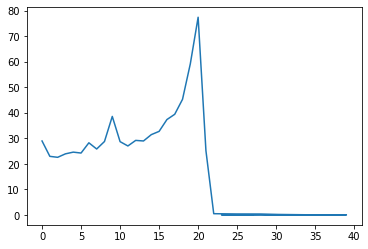

In [115]:
plt.plot(Layers, Myenergy)

In [116]:
#Edep felösszegzése csak egy részecskére

#groupby, df.loc, 

In [122]:
df


,PDGEncoding,trackID,parentID,time,eventID,posX,posY,posZ,momDirX,momDirY,...,volumeID[1],volumeID[2],volumeID[3],volumeID[4],volumeID[5],volumeID[6],volumeID[7],volumeID[8],volumeID[9],Layer
0,2212,1,0,4.266860e-09,0,-4.290672,-12.014001,225.354004,-0.000040,-0.032942,...,1,0,0,3,-1,-1,-1,-1,-1,0
1,2212,1,0,4.651038e-09,0,-4.401403,-13.966887,283.153992,-0.003881,-0.032686,...,1,0,1,3,-1,-1,-1,-1,-1,1
2,2212,1,0,4.937034e-09,0,-4.612718,-15.247976,326.093994,-0.007630,-0.029960,...,1,1,0,3,-1,-1,-1,-1,-1,2
3,2212,1,0,4.973887e-09,0,-4.656821,-15.420478,331.593994,-0.004614,-0.032237,...,1,1,1,3,-1,-1,-1,-1,-1,3
4,2212,1,0,5.011235e-09,0,-4.693545,-15.602463,337.093994,-0.011429,-0.042155,...,1,1,2,3,-1,-1,-1,-1,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18960,2212,1,0,5.464516e-09,999,23.480654,-3.142196,397.593994,-0.003002,-0.043974,...,1,1,13,3,-1,-1,-1,-1,-1,15
18961,2212,1,0,5.513789e-09,999,23.480352,-3.359049,403.093994,-0.024220,-0.048505,...,1,1,14,3,-1,-1,-1,-1,-1,16
18962,2212,1,0,5.565798e-09,999,23.347410,-3.622267,408.593994,-0.026335,-0.049498,...,1,1,15,3,-1,-1,-1,-1,-1,17
18963,2212,1,0,5.621313e-09,999,23.209925,-3.867579,414.093994,-0.005338,-0.039552,...,1,1,16,3,-1,-1,-1,-1,-1,18


<Axes: xlabel='Layer'>

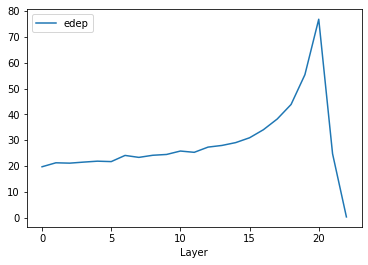

In [133]:
#Az összes részecske Bragg-görbéje
df.loc[df.parentID == 0, ["edep", "Layer"]].groupby("Layer").sum().plot()



    

In [146]:
df.set_index(["eventID", "trackID"], inplace =True)

In [152]:
indexes = df.index.unique()
df.loc[indexes[0], ["Layer", "edep"]]

Layer      edep
eventID trackID                 
0       1            0  0.023831
        1            1  0.022842
        1            2  0.027574
        1            3  0.015825
        1            4  0.022062
        1            5  0.021086
        1            6  0.026588
        1            7  0.036359
        1            8  0.028056
        1            9  0.027997
        1           10  0.054952
        1           11  0.034235
        1           12  0.027216
        1           13  0.039361
        1           14  0.043833
        1           15  0.035159
        1           16  0.039829
        1           17  0.051932
        1           18  0.060874
        1           19  0.072420
        1           20  0.148388

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:889: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


<Axes: xlabel='eventID,trackID'>

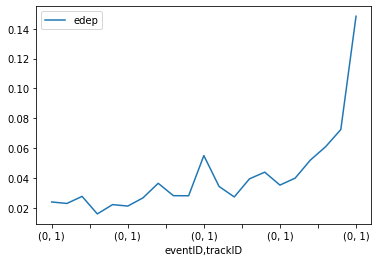

In [153]:
df.loc[indexes[0], ["Layer", "edep"]].plot(y = "edep")

#A rétegenként leadott energia egy részecskére







In [63]:
#Különböző energiákra sok Bragg-görbe generálás
#Jackknife módszerrel ellenőrzés
#2-3 futás után megnézni a varianciát
#Víz fantommal


   PDGEncoding  trackID  parentID          time  eventID       posX      posY  \
0         2212        1         0  4.612551e-09        0  12.875459 -0.045897   
1         2212        1         0  5.053970e-09        0  15.330603  0.861206   
2         2212        1         0  5.383410e-09        0  17.097225  1.659230   
3         2212        1         0  5.426075e-09        0  17.336983  1.726660   
4         2212        1         0  5.469879e-09        0  17.604889  1.849732   

         posZ   momDirX   momDirY  ...  volumeID[0]  volumeID[1]  volumeID[2]  \
0  225.354004  0.044687  0.009984  ...            0            1            0   
1  283.153992  0.044089  0.020782  ...            0            1            0   
2  326.093994  0.045484  0.014266  ...            0            1            1   
3  331.593994  0.045002  0.022530  ...            0            1            1   
4  337.093994  0.051101  0.031774  ...            0            1            1   

   volumeID[3]  volumeID[4

In [93]:
import numpy as np
import pandas as pd
import os

# A mappa és fájl nevének megadása
folder_name = '100 eV víz fantom'
file_name = '1711326113_e4771105-24b8-4bf1-a291-3367054b9edc_water_10000Primaries_1.hits.npy'

# A teljes elérési útvonal összeállítása
file_path = os.path.join(folder_name, file_name)

# A fájl beolvasása numpy tömbként, feltételezve, hogy a jelenlegi munkakönyvtárban vagyunk
# és a fájl létezik
data = np.load(file_path)

# A numpy tömb konvertálása pandas DataFrame-é
df = pd.DataFrame(data)

# A DataFrame első öt sorának megjelenítése
print(df.head())


   PDGEncoding  trackID  parentID          time  eventID       posX  \
0           11       29        28  4.801290e-09      105 -17.260948   
1           11       29        28  4.801292e-09      105 -17.261011   
2           11       29        28  4.801292e-09      105 -17.261015   
3           11       29        28  4.801292e-09      105 -17.261024   
4           11       29        28  4.801297e-09      105 -17.261259   

        posY        posZ   momDirX   momDirY  ...  volumeID[0]  volumeID[1]  \
0  62.322464  225.329437 -0.157600  0.337622  ...            0            1   
1  62.322601  225.329819 -0.163961  0.337037  ...            0            1   
2  62.322609  225.329834 -0.167947  0.337778  ...            0            1   
3  62.322632  225.329895 -0.168054  0.335819  ...            0            1   
4  62.323097  225.331177 -0.166924  0.332672  ...            0            1   

   volumeID[2]  volumeID[3]  volumeID[4]  volumeID[5]  volumeID[6]  \
0            0            0 

In [94]:
df['Layer'] = 2*df["volumeID[2]"]+df["volumeID[3]"]
column_names = df.columns
print("Oszlopnevek:", column_names)


Oszlopnevek: Index(['PDGEncoding', 'trackID', 'parentID', 'time', 'eventID', 'posX', 'posY',
       'posZ', 'momDirX', 'momDirY', 'momDirZ', 'edep', 'volumeID[0]',
       'volumeID[1]', 'volumeID[2]', 'volumeID[3]', 'volumeID[4]',
       'volumeID[5]', 'volumeID[6]', 'volumeID[7]', 'volumeID[8]',
       'volumeID[9]', 'Layer'],
      dtype='object')


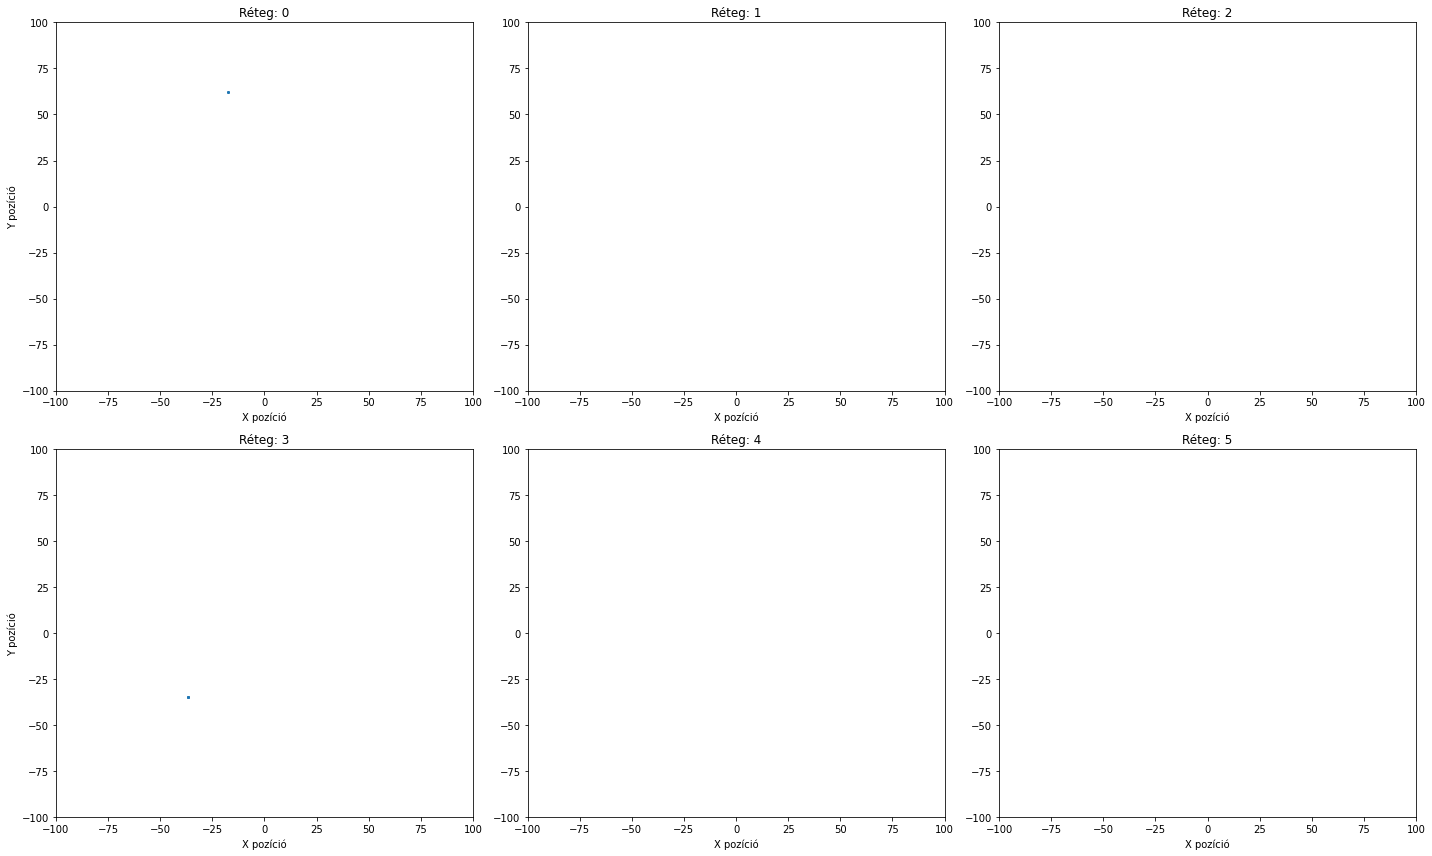

In [95]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))  # Módosítva a subplot sorok/oszlopok számát

axs = axs.flatten()  # A többdimenziós tömböt egydimenzióssá alakítjuk az egyszerű indexelés érdekében

for i,k in enumerate( [0,1, 2, 3, 4, 5]):
    dft = df[df.Layer== k]
    axs[i].scatter(dft.posX, dft.posY, s=1)
    axs[i].set_ylim(-100, 100)
    axs[i].set_xlim(-100, 100)
    
    axs[i].set_title(f'Réteg: {i}')
    axs[i].set_xlabel('X pozíció')
    if i % 3 == 0:  # Minden sor első eleménél adjuk meg az Y címkét
        axs[i].set_ylabel('Y pozíció')

plt.tight_layout()
plt.show()

In [96]:

Layers = df.Layer.unique() 
Myenergy = np.zeros(len(Layers))
for i,k in enumerate(Layers):
    Myenergy[i] = (df[df.Layer== k]["edep"].sum())
    

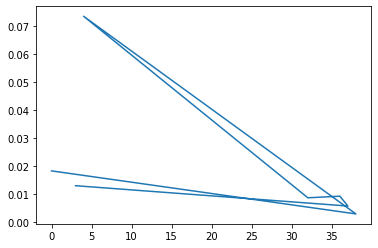

In [88]:
plt.plot(Layers, Myenergy)

In [97]:
# A mappa és fájl nevének megadása
folder_name = '500 eV víz fantom'
file_name = '1711326318_311259dc-d5db-49f3-8bed-6edd9b091e40_water_10000Primaries_1.hits.npy'

# A teljes elérési útvonal összeállítása
file_path = os.path.join(folder_name, file_name)

# A fájl beolvasása numpy tömbként, feltételezve, hogy a jelenlegi munkakönyvtárban vagyunk
# és a fájl létezik
data = np.load(file_path)

# A numpy tömb konvertálása pandas DataFrame-é
df = pd.DataFrame(data)

# A DataFrame első öt sorának megjelenítése
print(df.head())

   PDGEncoding  trackID  parentID          time  eventID      posX      posY  \
0         2212        1         0  3.215554e-09        0 -2.169334 -2.851363   
1         2212        1         0  3.477063e-09        0 -1.513191 -2.702196   
2         2212        1         0  3.671378e-09        0 -1.024339 -2.640067   
3         2212        1         0  3.696282e-09        0 -0.964774 -2.644895   
4         2212        1         0  3.721222e-09        0 -0.908280 -2.663851   

         posZ   momDirX   momDirY  ...  volumeID[0]  volumeID[1]  volumeID[2]  \
0  225.354004  0.011470  0.003639  ...            0            1            0   
1  283.153992  0.011456  0.002455  ...            0            1            0   
2  326.093994  0.011139 -0.000491  ...            0            1            1   
3  331.593994  0.009560 -0.002890  ...            0            1            1   
4  337.093994  0.012378 -0.004154  ...            0            1            1   

   volumeID[3]  volumeID[4]  vol

In [98]:
df['Layer'] = 2*df["volumeID[2]"]+df["volumeID[3]"]
column_names = df.columns
print("Oszlopnevek:", column_names)

Oszlopnevek: Index(['PDGEncoding', 'trackID', 'parentID', 'time', 'eventID', 'posX', 'posY',
       'posZ', 'momDirX', 'momDirY', 'momDirZ', 'edep', 'volumeID[0]',
       'volumeID[1]', 'volumeID[2]', 'volumeID[3]', 'volumeID[4]',
       'volumeID[5]', 'volumeID[6]', 'volumeID[7]', 'volumeID[8]',
       'volumeID[9]', 'Layer'],
      dtype='object')


In [99]:
Layers = df.Layer.unique() 
Myenergy = np.zeros(len(Layers))
for i,k in enumerate(Layers):
    Myenergy[i] = (df[df.Layer== k]["edep"].sum())

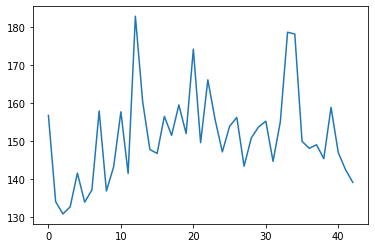

In [100]:
plt.plot(Layers, Myenergy)

<Axes: xlabel='Layer'>

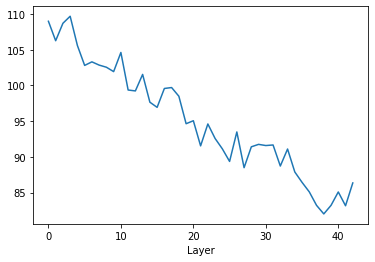

In [105]:
df = df[df.parentID == 0]
df.groupby("Layer").sum()["edep"].plot()



In [29]:
#Head fantomot 90 fokkal elforgatni

#Reakciótípus megnézése

In [30]:
# A fájl elérési útvonalának megadása
file_path = 'Phantom head/1709906900_07f6f0cb-56a4-40b1-a14b-a0208d22bbf8_water_1000Primaries_1.hits.npy'

# A fájl beolvasása numpy tömbként
data = np.load(file_path)

# A numpy tömb konvertálása pandas DataFrame-é
df2 = pd.DataFrame(data)

# Az adatok megjelenítése
print(df2.head())

   PDGEncoding  trackID  parentID          time  eventID      posX       posY  \
0         2212        1         0  4.266860e-09        0 -4.290672 -12.014001   
1         2212        1         0  4.651038e-09        0 -4.401403 -13.966887   
2         2212        1         0  4.937034e-09        0 -4.612718 -15.247976   
3         2212        1         0  4.973887e-09        0 -4.656821 -15.420478   
4         2212        1         0  5.011235e-09        0 -4.693545 -15.602463   

         posZ   momDirX   momDirY  ...  volumeID[0]  volumeID[1]  volumeID[2]  \
0  225.354004 -0.000040 -0.032942  ...            0            1            0   
1  283.153992 -0.003881 -0.032686  ...            0            1            0   
2  326.093994 -0.007630 -0.029960  ...            0            1            1   
3  331.593994 -0.004614 -0.032237  ...            0            1            1   
4  337.093994 -0.011429 -0.042155  ...            0            1            1   

   volumeID[3]  volumeID[4

In [31]:
df2['Layer'] = 2*df2["volumeID[2]"]+df2["volumeID[3]"]
column_names = df2.columns


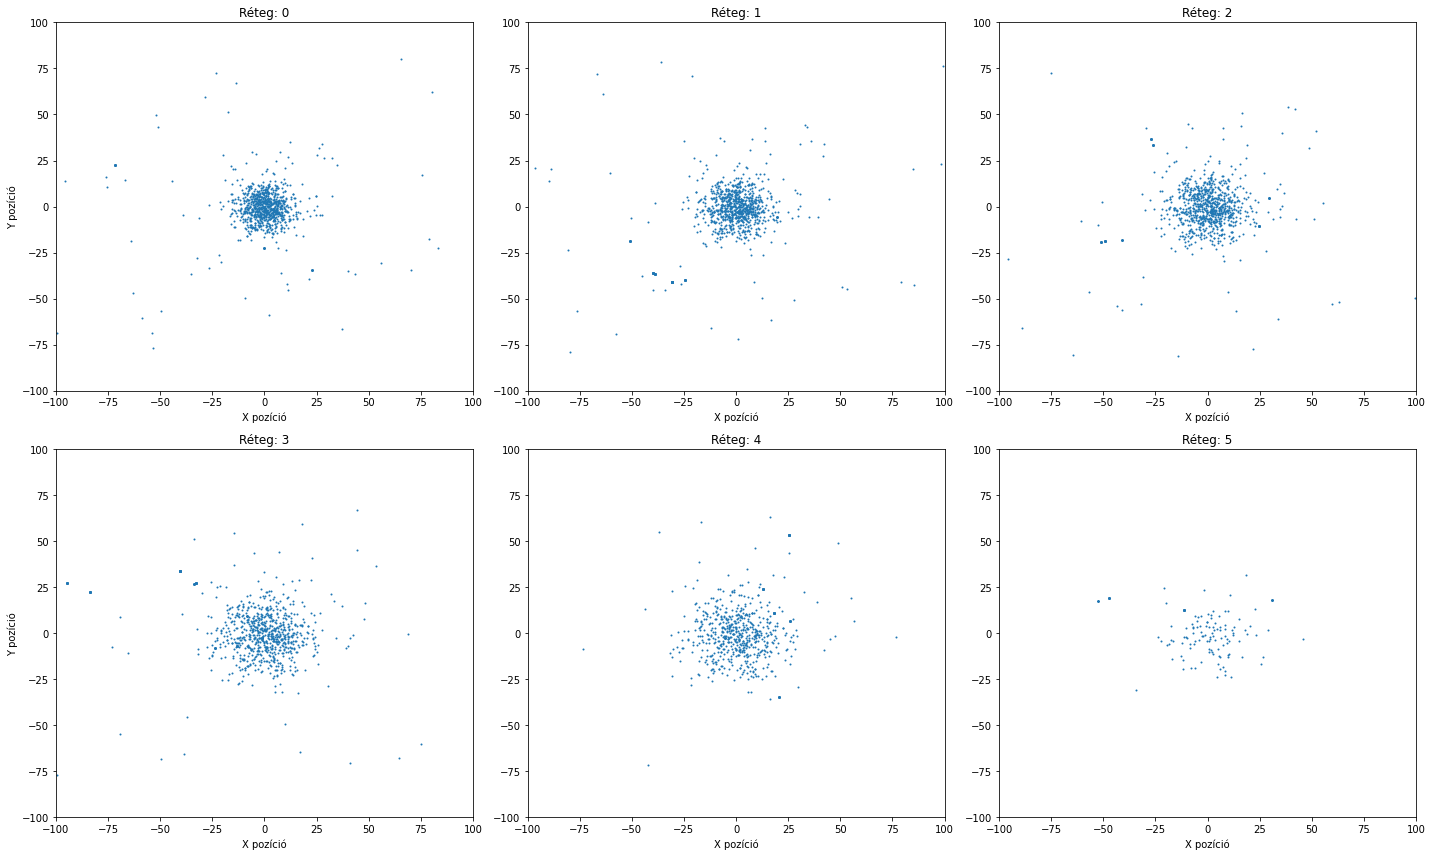

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))  # Módosítva a subplot sorok/oszlopok számát

axs = axs.flatten()  # A többdimenziós tömböt egydimenzióssá alakítjuk az egyszerű indexelés érdekében

for i,k in enumerate( [0,1, 4, 15, 20, 21]):
    dft2 = df2[df2.Layer== k]
    axs[i].scatter(dft2.posX, dft2.posY, s=1)
    axs[i].set_ylim(-100, 100)
    axs[i].set_xlim(-100, 100)
    
    axs[i].set_title(f'Réteg: {i}')
    axs[i].set_xlabel('X pozíció')
    if i % 3 == 0:  # Minden sor első eleménél adjuk meg az Y címkét
        axs[i].set_ylabel('Y pozíció')

plt.tight_layout()
plt.show()

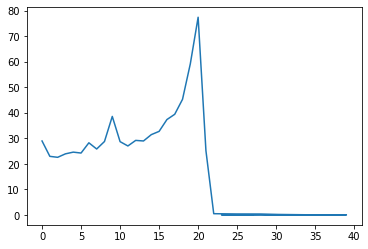

In [33]:
Layers = df2.Layer.unique() 
Myenergy = np.zeros(len(Layers))
for i,k in enumerate(Layers):
    Myenergy[i] = (df2[df2.Layer== k]["edep"].sum())
    

plt.plot(Layers, Myenergy)

Most elforgatom 90$^\circ$-al a head fantomot.

In [ ]:
#